In [1]:
import os
# path_Data = "/content/gdrive/MyDrive/VTCA/Datasets/"
path_Data = 'E:\\MSE\\HomeWork\\Python\\Buoi4\\OnClass\\B\\Customer Segmentation\\'
checkPath = os.path.isdir(path_Data)
checkFile = os.path.isfile(path_Data + "E-Commerce Data.csv")
print("The path and file are valid or not :", checkPath, checkFile)


The path and file are valid or not : True True


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
data = pd.read_csv(path_Data + "E-Commerce Data.csv", encoding='cp1252')


In [4]:
print(data.shape)
display(data.head())


(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
round(data.describe(), 2)


,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [7]:
# Dataset has negative values in Quantity and UnitPrice. remove those entries from dataset
df = data[(data.Quantity > 0)]
df = df[(df.UnitPrice > 0)]


In [8]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


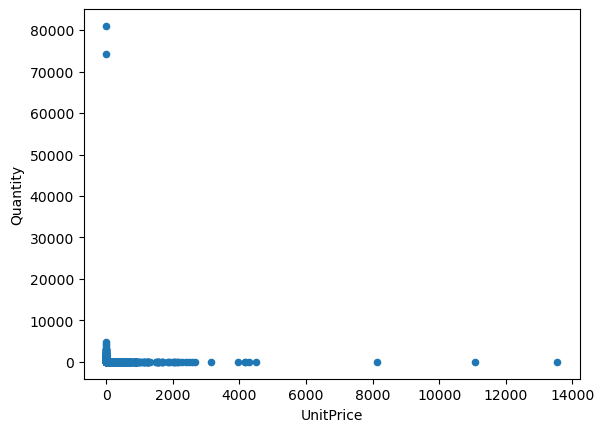

In [9]:
plot = df.plot.scatter('UnitPrice', 'Quantity')


In [10]:
# Based on the above graph we could see some of ouliers in the dataset
df = df[(df.Quantity < 500)]
df = df[(df.UnitPrice < 100)]


In [11]:
# Check Null values are present in the dataset
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131591
Country             0
dtype: int64

In [12]:
# Customer column has 131591 null values. Customer Id is unique values since we cant replace with any other values, hence remove it from the dataset
df = df.dropna(how='any', axis='rows')
df.shape


(397262, 8)

In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
ord_cnty1 = df.groupby('Country')
ord_cnty1.describe()


Quantity                                                 \
                         count       mean        std  min    25%   50%    75%   
Country                                                                         
Australia               1171.0  65.766012  78.940451  1.0  10.00  30.0   96.0   
Austria                  398.0  12.263819  21.590493  1.0   6.00  10.0   12.0   
Bahrain                   17.0  15.294118  24.959379  2.0   6.00   6.0    8.0   
Belgium                 2031.0  11.441162  13.597680  1.0   4.00  10.0   12.0   
Brazil                    32.0  11.125000   8.476723  2.0   3.00  10.0   18.0   
Canada                   149.0  15.154362  24.551580  1.0   6.00  12.0   20.0   
Channel Islands          747.0  12.704150  22.676405  1.0   4.00  10.0   12.0   
Cyprus                   607.0  10.464580  23.429023  1.0   2.00   6.0   12.0   
Czech Republic            25.0  26.840000  17.276381  1.0  18.00  24.0   24.0   
Denmark                  380.0  21.671053  27.399800  1.0  12.00  12.0   24.0   
EIRE                    7229.0  18.914373  35.155458  1.0   4.00  12.0   16.0   
European Community        60.0   8.316667   6.466319  1.0   3.75   6.0   12.0   
Finland                  684.0  15.646199  21.013500  1.0   6.00  10.0   16.0   
France                  8331.0  13.200456  17.628006  1.0   6.00  10.0   12.0   
Germany                 9031.0  13.138412  16.531124  1.0   6.00  10.0   12.0   
Greece                   145.0  10.737931   7.689297  1.0   6.00  10.0   12.0   
Iceland                  182.0  13.505495  18.856172  2.0   6.00  12.0   12.0   
Israel                   247.0  16.376518  16.321713  1.0   4.00  12.0   24.0   
Italy                    757.0  10.714663  13.613445  1.0   4.00   8.0   12.0   
Japan                    309.0  52.893204  68.493991  1.0  12.00  48.0   72.0   
Lebanon                   45.0   8.577778   4.314294  2.0   6.00   8.0   12.0   
Lithuania                 35.0  18.628571  10.137542  6.0  12.00  16.0   24.0   
Malta                    112.0   8.660714   7.805696  1.0   4.00   6.0   12.0   
Netherlands             2347.0  80.180230  76.611449  1.0  16.00  72.0  100.0   
Norway                  1067.0  18.118088  22.638217  1.0   6.00  12.0   24.0   
Poland                   330.0  11.163636  10.029313  1.0   4.00  10.0   12.0   
Portugal                1456.0  11.068681  11.862706  1.0   4.00  10.0   12.0   
RSA                       57.0   6.157895   3.288451  2.0   3.00   6.0   10.0   
Saudi Arabia               9.0   8.888889   3.887301  2.0   6.00  12.0   12.0   
Singapore                214.0  24.448598  28.015668  1.0  10.00  12.0   24.0   
Spain                   2484.0  11.247987  22.833718  1.0   3.00   6.0   12.0   
Sweden                   440.0  66.515909  96.639926  1.0   8.00  20.0   96.0   
Switzerland             1841.0  16.340033  18.859249  1.0   6.00  12.0   24.0   
USA                      179.0  13.731844  11.488423  1.0   6.00  12.0   16.0   
United Arab Emirates      68.0  14.441176  12.474909  1.0   6.00  12.0   12.0   
United Kingdom        353802.0  10.609590  23.317017  1.0   2.00   4.0   12.0   
Unspecified              244.0   7.331967   8.895856  1.0   1.00   2.0   12.0   

                            UnitPrice            ... CustomerID           \
                        max     count      mean  ...        75%      max   
Country                                          ...                       
Australia             480.0    1171.0  2.779795  ...    12422.0  16321.0   
Austria               288.0     398.0  4.256030  ...    12818.0  12865.0   
Bahrain                96.0      17.0  4.644118  ...    12355.0  12355.0   
Belgium               272.0    2031.0  3.630158  ...    12431.0  12876.0   
Brazil                 24.0      32.0  4.456250  ...    12769.0  12769.0   
Canada                288.0     149.0  2.406577  ...    17444.0  17844.0   
Channel Islands       407.0     747.0  4.145448  ...    14936.0  14937.0   
Cyprus               

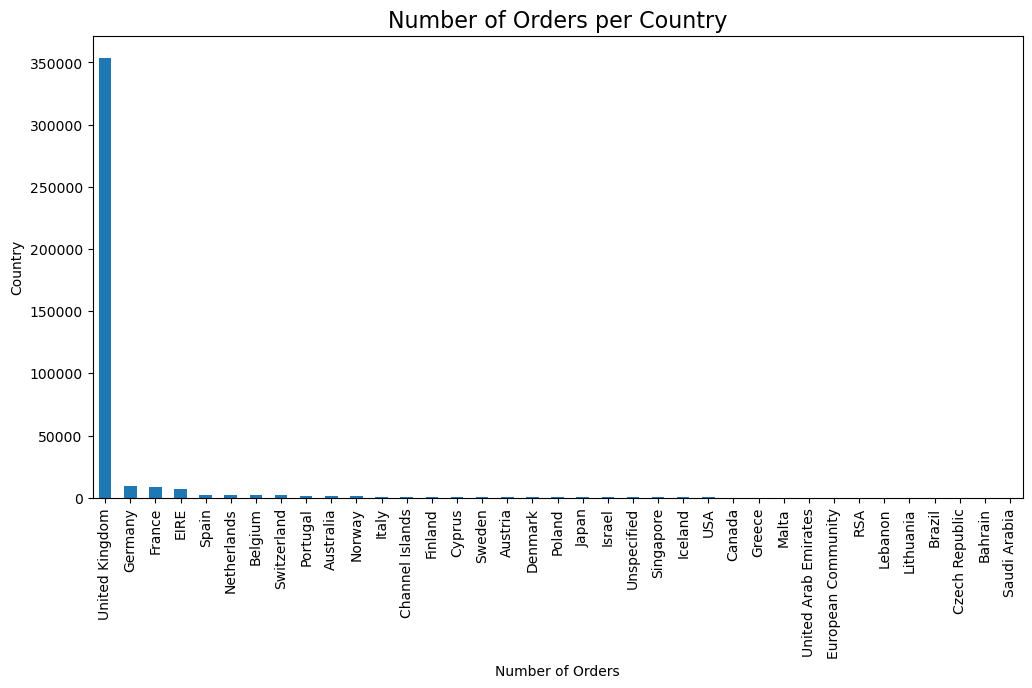

In [15]:
ord_cnty = df.groupby('Country')[
    'InvoiceNo'].count().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ord_cnty.plot.bar()
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders per Country', fontsize=16)
plt.show()


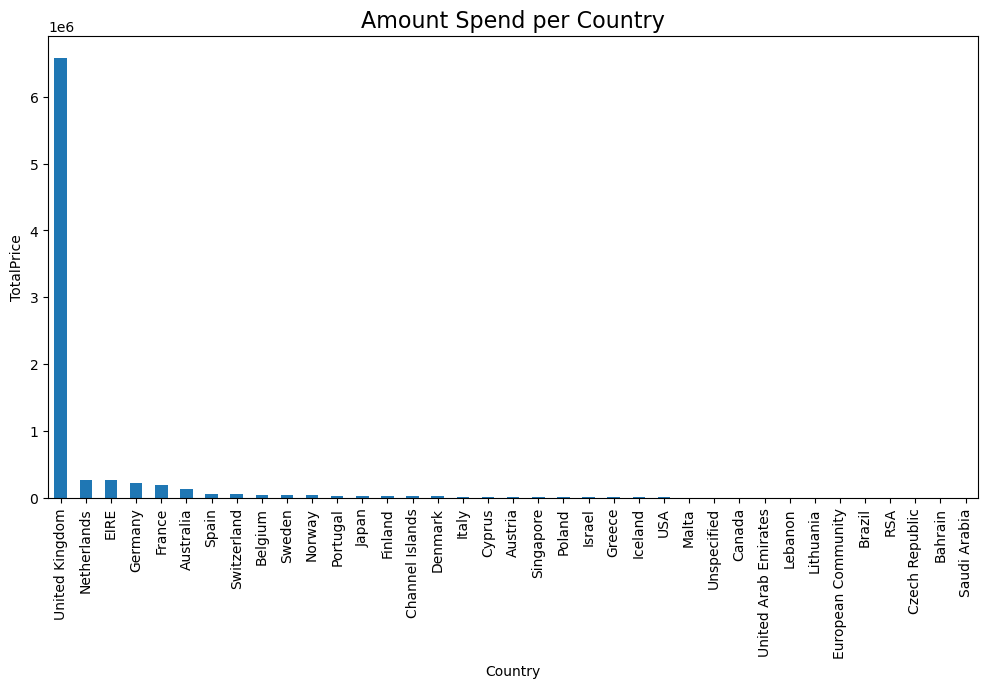

In [16]:
amt_cnty = df.groupby('Country')[
    'TotalPrice'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
amt_cnty.plot.bar()
plt.xlabel('Country')
plt.ylabel('TotalPrice')
plt.title('Amount Spend per Country', fontsize=16)
plt.show()


In [ ]:
dfg = df.groupby(by='CustomerID').agg(
    {'Quantity': 'sum', 'TotalPrice': 'sum'}).reset_index()
dfg.rename(columns={'Quantity': 'Total_Quantity',
           'TotalPrice': 'Total_Amount'}, inplace=True)
print(dfg.head(3))


   CustomerID  Total_Quantity  Total_Amount
0     12347.0            2458       4310.00
1     12348.0            2341       1797.24
2     12349.0             630       1457.55


In [19]:
X = dfg.iloc[:, [1, 2]].values
X1 = np.array(X)
print(X)
print(X.mean(axis=0), X1.std(axis=0))
# Feature Scaling
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X)
print(X.shape)


[[2458.   4310.  ]
 [2341.   1797.24]
 [ 630.   1457.55]
 ...
 [ 103.    178.05]
 [1397.   2094.88]
 [1586.   1837.28]]
[1070.64011116 1878.2734817 ] [4267.00796798 7512.34103559]
[[ 0.32513647  0.32369757]
 [ 0.29771678 -0.01078671]
 [-0.10326677 -0.05600431]
 ...
 [-0.22677251 -0.22632405]
 [ 0.07648448  0.02883342]
 [ 0.12077781 -0.00545682]]
(4318, 2)


In [20]:
print((74215-1191)/5045)


14.474529236868186


c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\cl

Text(0, 0.5, 'wcss: sum of dist. of sample to their closest cluster center')

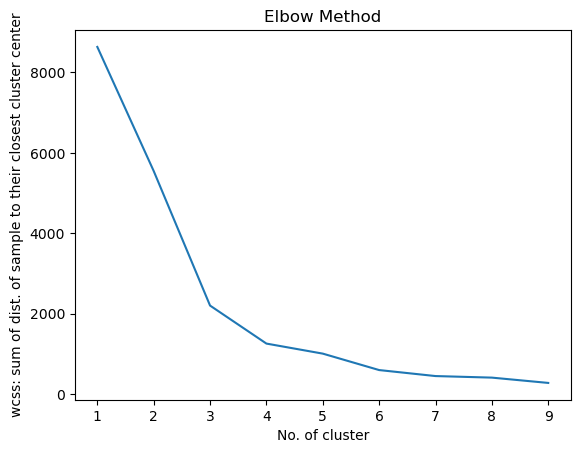

In [21]:
wcss = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++',)
    # KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    clusters = kmeans.predict(X)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center')


In [22]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=6, init='k-means++')
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[5 5 0 ... 0 0 0]


c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(


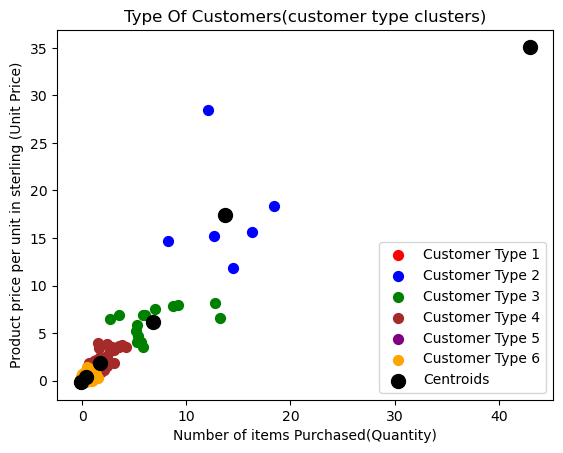

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=50, c='red', label='Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=50, c='blue', label='Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=50, c='green', label='Customer Type 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=50, c='brown', label='Customer Type 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
            s=50, c='purple', label='Customer Type 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1],
            s=50, c='orange', label='Customer Type 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='black', label='Centroids')
plt.title('Type Of Customers(customer type clusters)')
plt.xlabel('Number of items Purchased(Quantity)')
plt.ylabel('Product price per unit in sterling (Unit Price)')
plt.legend()
plt.show()
# replace X by X1


In [24]:
print(X[:3, :])
print(y_kmeans[:12])


[[ 0.32513647  0.32369757]
 [ 0.29771678 -0.01078671]
 [-0.10326677 -0.05600431]]
[5 5 0 0 0 0 0 0 5 5 0 5]


## Part 2: K-Mean algorithm


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(12)


In [26]:
# datasets are 3 random samples from a multivariate normal distribution
'''
np.random.seed(12)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 1000
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
'''

X0 = np.array([[11, 12], [11.5, 12], [12, 13], [12.5, 13]])
X1 = np.array([[16, 22], [17.5, 22], [14, 23], [16.5, 23]])
X2 = np.array([[31, 25], [31.5, 24], [32, 25.5], [32.5, 26]])

X = np.concatenate((X0, X1, X2), axis=0)
# print(X3)

N = X0.shape[0]


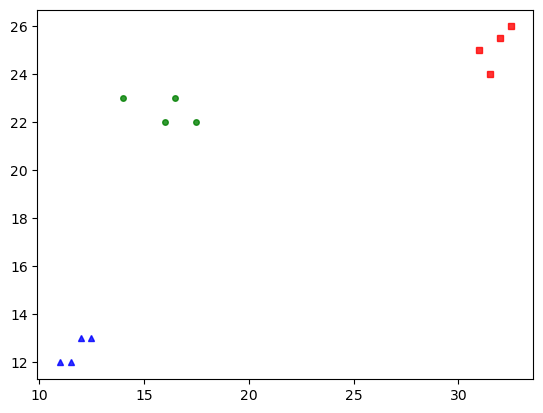

In [27]:
plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=4, alpha=.8)
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha=.8)
plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=4, alpha=.8)
plt.show()


In [28]:
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(len(original_label))


12


In [29]:
K = 3


# Using scikit-learn


In [32]:
def kmeans_display1(X, label, ct):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=4, alpha=.8)

    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=4, alpha=.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=4, alpha=.8)

    plt.plot(ct[:, 0], ct[:, 1], 'b^', markersize=20, alpha=.8, color='m')
    plt.axis('equal')
    plt.plot()
    # plt.show()
